<a href="https://colab.research.google.com/gist/Sanket758/a5377ad5f817027a907ef008442deb56/ml-project-bmp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML Project - Bank Marketing Prediction**

## Tasks to perform
## 1 . Read in the file and get basic information about the data, including numerical summaries.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('bank-marketing.csv')
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.shape

(45211, 19)

So, we have 45211 records with 19 collumns

In [4]:
df.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

response column is our target variable and others are feature columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


So, there are total 19 columns outta which 8 are numerical and 11 are categorical.
and no null value in any column, so that's a good news!

In [6]:
# numerical summary
df.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## 2 . Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [7]:
df['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

yes, there is definitely something fishy going on here, we can see that min value is -1 and 75% of the values are -1. 

In [8]:
df['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

As we can see there are 36,954 records having pvalue -1. this is hurting the overall mean.

So, i did a quick search on UCI machine Learning repo site to check what does the pdays actually means:  
**pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)  
here 999 is replace by -1

So, if pdays = -1, it indicates that this person was not previosly contacted so, we will drop these records because we want to study on people who was involved in the campaign

In [9]:
df = df.drop(df[df.pdays==-1].index)
df.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,admin.,50000,married,tertiary,yes,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,50000,single,secondary,yes,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,70000,married,secondary,yes,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,100000,married,tertiary,yes,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,100000,married,tertiary,yes,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes


In [10]:
df.shape

(8257, 19)

## 3. Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [11]:
df.pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

Now that we have limit ourselves to the relevant values only the mean and median looks better.

## 4. Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
condition = (df['education']=='unknown')
df = df.drop(df[condition].index, axis =0)

In [14]:
bar=df.groupby(['education'])['balance'].median()
bar

education
primary      520
secondary    527
tertiary     775
Name: balance, dtype: int64

In [15]:
bardf = pd.DataFrame(bar)

<AxesSubplot:ylabel='education'>

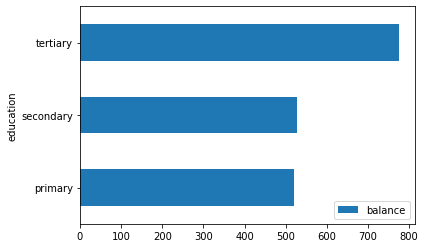

In [16]:
bardf.plot.barh()

So the unknown group has the highest median, and then tertiary is the second highest


## 5. Make a box plot for pdays. Do you see any outliers?

In [20]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='pdays'>

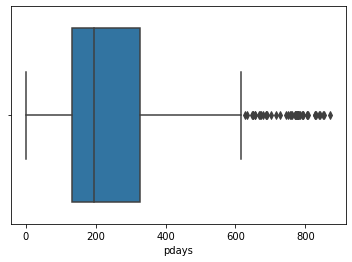

In [21]:
sns.boxplot(df['pdays'])

so our median lies at 200, and there are some outliers after 600.

## Bivariate Analysis

### Convert the response variable to a convenient form

In [22]:
df = df.replace({'response': {"yes": 1,'no':0}})

In [23]:
numerical_cols = list(df.select_dtypes(exclude='object').columns)
numerical_cols

['age',
 'salary',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'response']

In [24]:
categorical_cols = list(df.select_dtypes(exclude=[np.number]).columns)
categorical_cols

['job',
 'marital',
 'education',
 'targeted',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

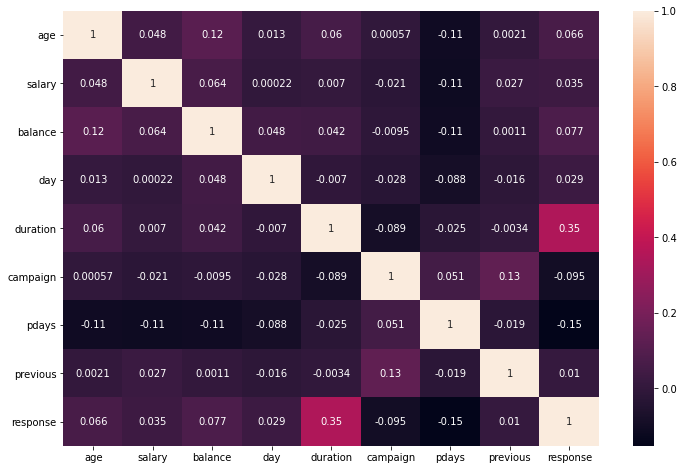

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True);

### Histograms

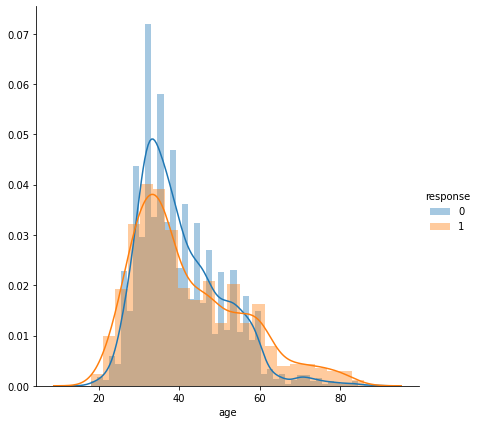

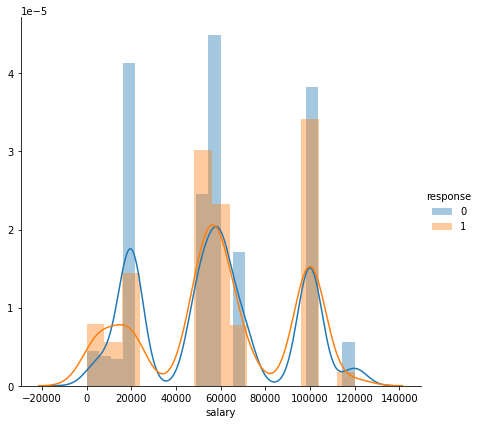

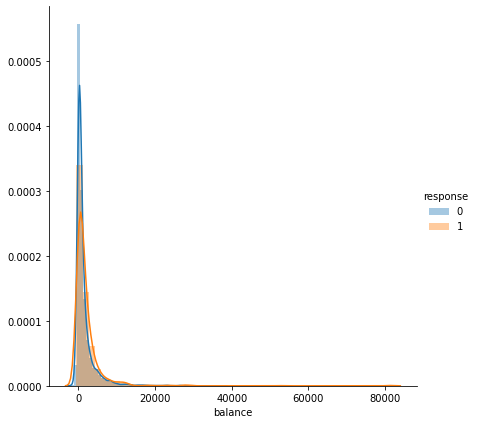

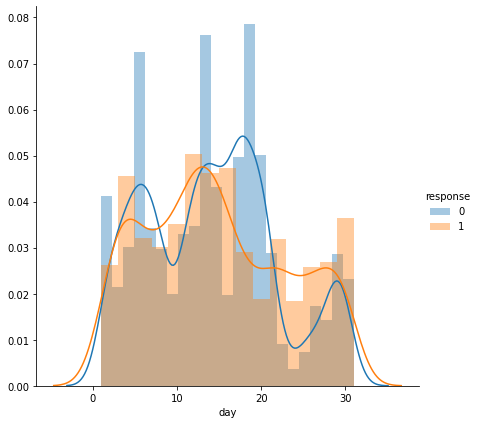

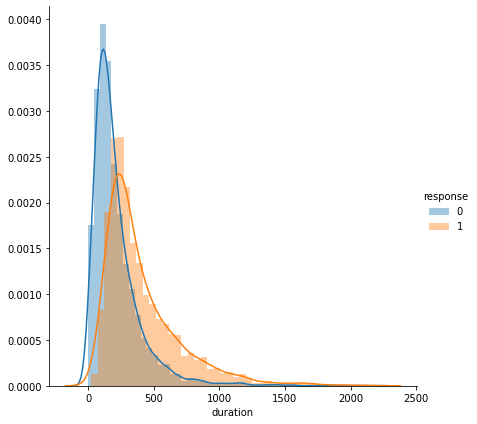

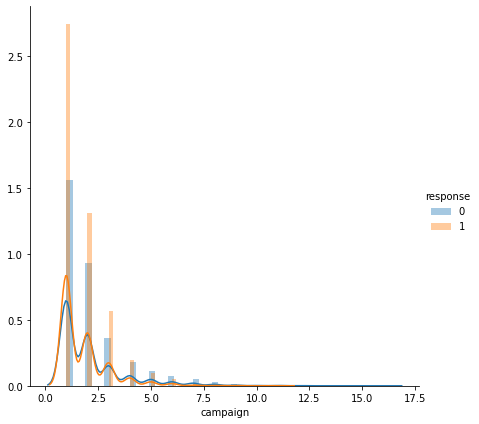

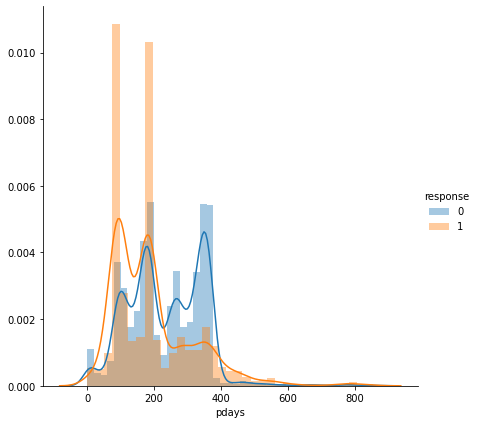

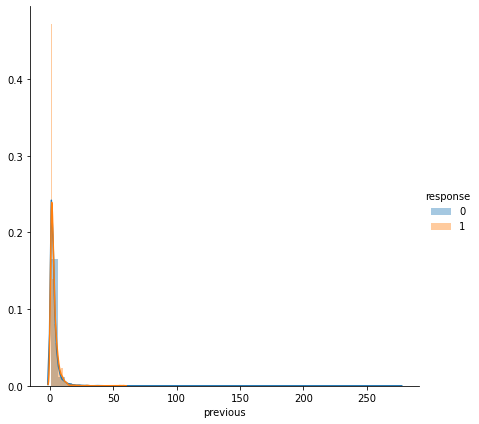

In [26]:
for col in numerical_cols:
    if col != 'response':
        sns.FacetGrid(df, hue='response', height=6).map(sns.distplot, col).add_legend()

## Box Plots
- Make suitable plots for associations with numerical features and categorical features’

-- For Numerical Columns

<AxesSubplot:xlabel='age'>

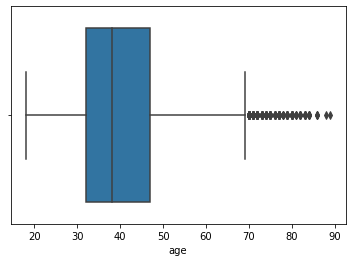

In [29]:
sns.boxplot('age', data =df)

<AxesSubplot:xlabel='salary'>

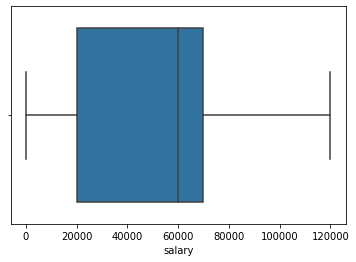

In [30]:
sns.boxplot('salary', data =df)

<AxesSubplot:xlabel='balance'>

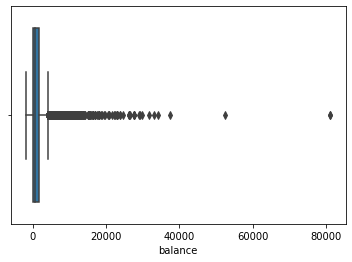

In [31]:
sns.boxplot('balance', data =df)

<AxesSubplot:xlabel='day'>

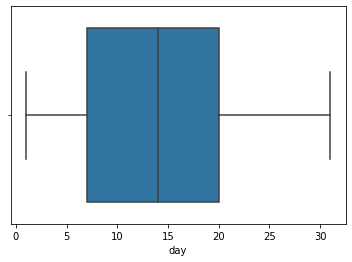

In [32]:
sns.boxplot('day', data =df)

<AxesSubplot:xlabel='duration'>

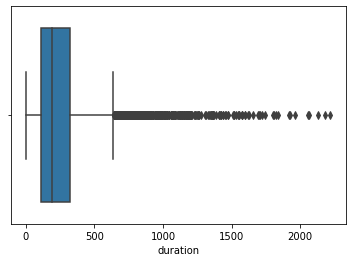

In [33]:
sns.boxplot('duration', data =df)

<AxesSubplot:xlabel='campaign'>

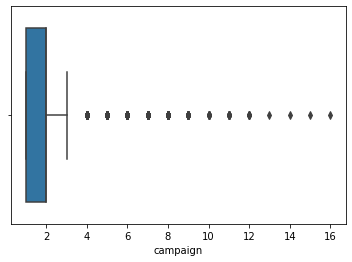

In [34]:
sns.boxplot('campaign', data =df)

<AxesSubplot:xlabel='pdays'>

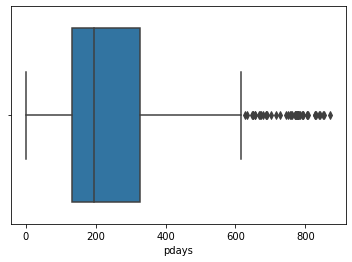

In [35]:
sns.boxplot('pdays', data =df)

<AxesSubplot:xlabel='previous'>

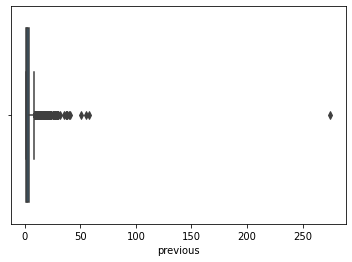

In [36]:
sns.boxplot('previous', data =df)

--------------------------------------------------For Categorical Columns -----------------------------------------------------

<AxesSubplot:xlabel='housing', ylabel='count'>

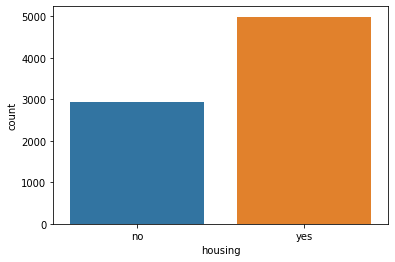

In [40]:
sns.countplot('housing', data=df)

<AxesSubplot:xlabel='job', ylabel='count'>

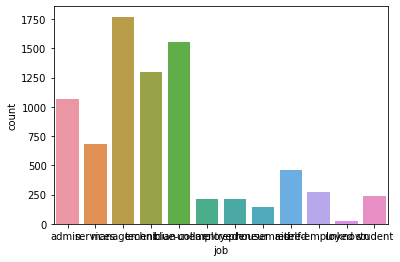

In [41]:
sns.countplot('job', data=df)

<AxesSubplot:xlabel='marital', ylabel='count'>

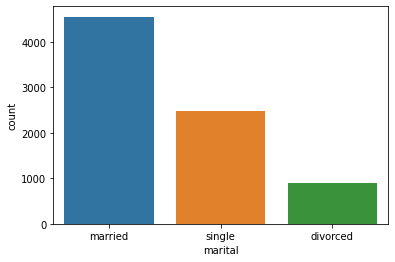

In [42]:
sns.countplot('marital', data=df)

<AxesSubplot:xlabel='education', ylabel='count'>

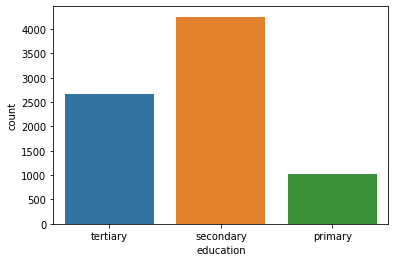

In [43]:
sns.countplot('education', data=df)

<AxesSubplot:xlabel='targeted', ylabel='count'>

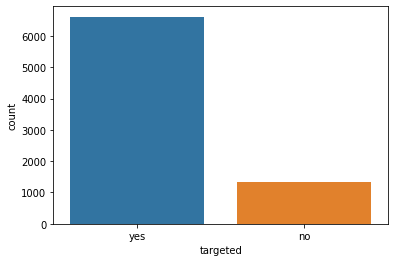

In [44]:
sns.countplot('targeted', data=df)

<AxesSubplot:xlabel='loan', ylabel='count'>

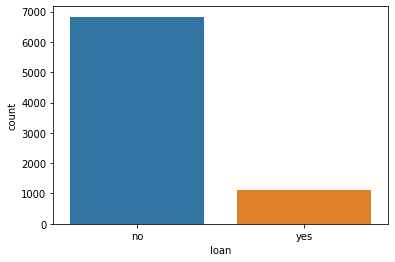

In [45]:
sns.countplot('loan', data=df)

<AxesSubplot:xlabel='contact', ylabel='count'>

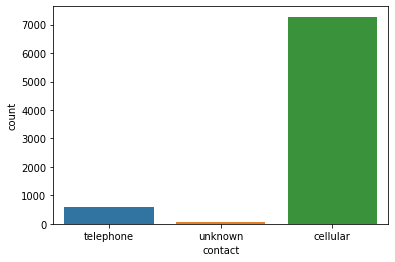

In [46]:
sns.countplot('contact', data=df)

<AxesSubplot:xlabel='month', ylabel='count'>

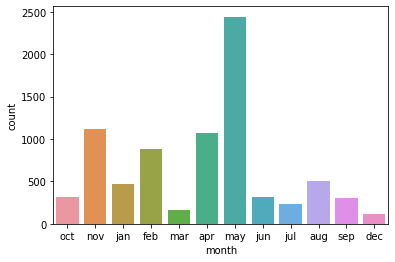

In [47]:
sns.countplot('month', data=df)

<AxesSubplot:xlabel='poutcome', ylabel='count'>

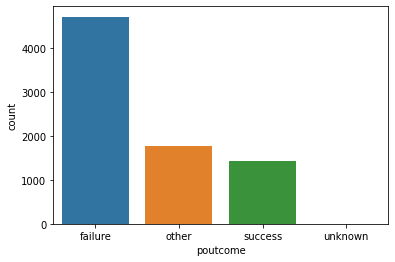

In [48]:
sns.countplot('poutcome', data=df)

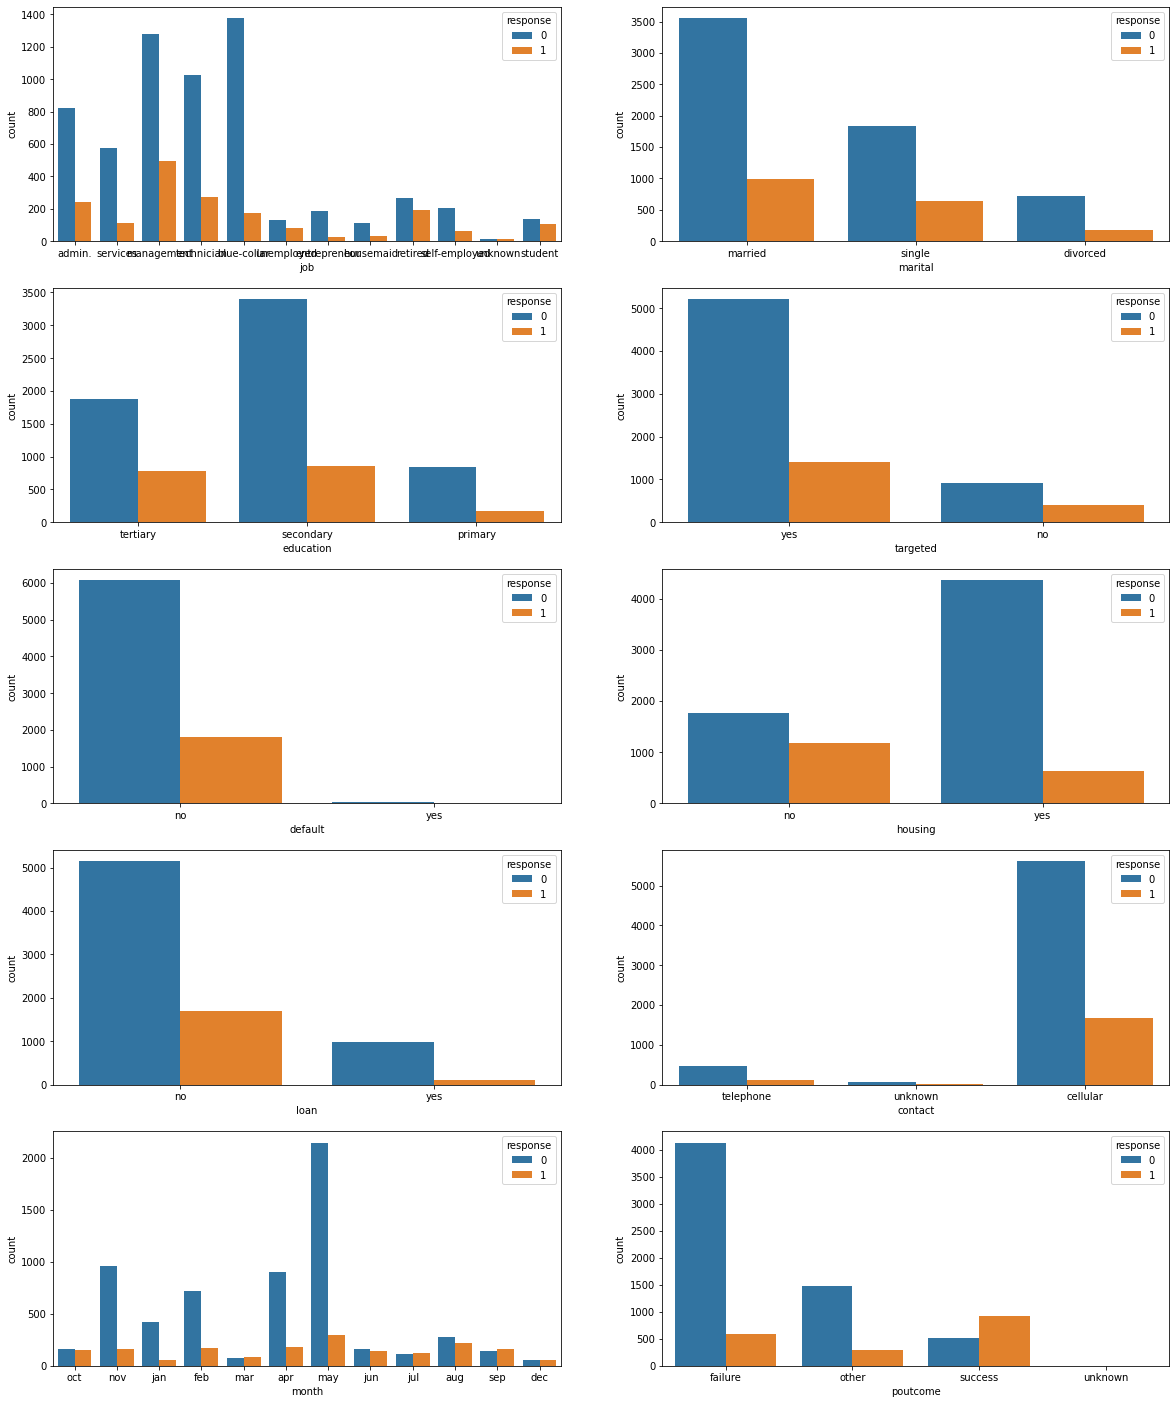

In [49]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))
for ax, col in list(zip(axes.flat, categorical_cols)):        
    sns.countplot(col, data=df,hue=df['response'], ax=ax)

## 6.Are the features about the previous campaign data useful?



In [50]:
df[numerical_cols].corr()['response']

age         0.065794
salary      0.035156
balance     0.077499
day         0.029438
duration    0.346612
campaign   -0.094501
pdays      -0.152175
previous    0.010057
response    1.000000
Name: response, dtype: float64

From the above, we can see previous collumns is not highly corelated with the response variable.

## 7. Are pdays and poutcome associated with the target? If yes, and if you plan to use them – how do you handle the pdays column with a value of -1 where the previous campaign data is missing? Explain your approach and your decision.


yes, if the previous outcome is success there is a high chance to get successful response again, so i will use poutcome in my final model. 

if pdays = -1, it indicates that this person was not previosly contacted so, i have dropped these records because we want to study on people who was involved in the campaign


## Data Preprocessing

Dropping collumns with unknown values, because those hurts the distributions

In [51]:
df.drop(df[df['poutcome']=='unknown'].index, inplace=True)
df.drop(df[df['contact']=='unknown'].index, inplace=True)
df.drop(df[df['job']=='unknown'].index, inplace=True)

In [52]:
df.job = df.job.str.replace('admin.', 'admin') 

Convert Categorical Features into Numerical

In [53]:
df_final = df.copy(deep=True)

In [54]:
from sklearn.preprocessing import LabelEncoder
df_final[categorical_cols] = df[categorical_cols].apply(LabelEncoder().fit_transform)

In [55]:
df_final.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
24060,33,0,50000,1,2,1,0,882,0,0,1,21,10,39,1,151,3,0,0
24062,42,0,50000,2,1,1,0,-247,1,1,1,21,10,519,1,166,1,1,1
24064,33,7,70000,1,1,1,0,3444,1,0,1,21,10,144,1,91,4,0,1
24072,36,4,100000,1,2,1,0,2415,1,0,1,22,10,73,1,86,4,1,0
24077,36,4,100000,1,2,1,0,0,1,0,1,23,10,140,1,143,3,0,1


## Train-Test Split

In [56]:
y = df_final.pop('response')
X = df_final

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=1)
X_train.shape, y_train.shape

((5489, 18), (5489,))

## Feature scaling

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [59]:
sc.fit(X_train[numerical_cols[:-1]]) #Last collumn was response, but we no more have it in X_Train so -1 indicates exclusion of that

StandardScaler()

In [60]:
X_train[numerical_cols[:-1]] = sc.transform(X_train[numerical_cols[:-1]])
X_train.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
31581,-1.143922,9,0.057221,2,2,0,0,-0.428296,1,1,0,-1.439143,0,-0.676059,7.580287,-1.476605,-0.334598,0
43264,0.903903,0,-0.258570,0,2,0,0,-0.460810,1,0,0,-0.549193,7,-0.515367,-0.682496,2.287009,-0.334598,0
30500,-0.876814,2,1.951969,2,2,0,0,-0.314189,0,1,0,-1.184872,3,0.596788,-0.046897,-1.944806,-0.039797,1
25129,-0.787778,4,1.320386,1,2,1,0,0.030279,1,0,0,0.467894,9,-0.405420,-0.046897,-0.405146,-0.039797,0
35754,-0.342599,9,0.057221,0,1,1,0,-0.400689,1,0,0,-0.803464,8,0.034368,-0.682496,0.513248,0.255004,1


In [61]:
X_test[numerical_cols[:-1]] = sc.transform(X_test[numerical_cols[:-1]])
X_test.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
39133,-1.411029,7,0.373012,2,1,1,0,-0.594855,1,0,0,0.467894,8,-0.477308,-0.046897,1.107503,-0.039797,1
41122,-1.321994,4,1.320386,2,2,0,0,-0.227075,1,0,0,0.340758,1,-0.439250,-0.682496,-0.225069,-0.629400,0
28611,1.438118,9,0.057221,0,1,1,0,-0.457436,1,1,0,1.866388,4,-0.388505,0.588702,0.198113,-0.334598,0
43613,-1.054886,3,-1.332261,2,2,0,0,-0.475227,0,0,0,-1.312008,8,0.034368,-0.682496,-1.224497,0.255004,2
27855,1.171011,2,1.951969,1,2,1,0,-0.134746,0,1,0,1.739252,4,-0.075579,-0.682496,-0.360127,1.434208,0


## Predictive model 1: Logistic regression

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score, classification_report
from sklearn.model_selection import cross_val_score

In [63]:
clf = LogisticRegression()

In [64]:
clf.fit(X_train, y_train)

LogisticRegression()

In [65]:
y_pred = clf.predict(X_test)

In [66]:
def show_report(clf, y_true, y_pred): 
    print('Accuracy: ',accuracy_score(y_true, y_pred))
    print('================================')
    print('Precision: ',precision_score(y_true, y_pred))
    print('================================')
    print('Recall: ',recall_score(y_true, y_pred))
    print('================================')
    print('\nClassification Report\n')
    print(classification_report(y_true, y_pred))
    print('================================')
    print('\nconfusion_matrix\n')
    print(confusion_matrix(y_true, y_pred))
    print('================================')
    print('\ncross validation:',cross_val_score(clf, X, y, cv=5))

In [67]:
show_report(clf, y_pred, y_test)

Accuracy:  0.8232044198895028
Precision:  0.5
Recall:  0.6610576923076923

Classification Report

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1937
           1       0.50      0.66      0.57       416

    accuracy                           0.82      2353
   macro avg       0.71      0.76      0.73      2353
weighted avg       0.85      0.82      0.83      2353


confusion_matrix

[[1662  275]
 [ 141  275]]

cross validation: [0.77310389 0.72530274 0.78635204 0.77742347 0.75127551]


## RFE Model

In [68]:
from sklearn.feature_selection import RFE
rfe = RFE(clf, 15)

In [69]:
rfe = rfe.fit(X_train, y_train)
ranks = rfe.ranking_
ranks

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 1, 1, 1, 1, 1])

The higher values mean that they were dropped at the early stage and the smaller values mean that they survive till the end and prove themselves fittest for the model. In a nutshell, columns with lower ranks are good for us.


In [70]:
print(X_train.columns[rfe.support_])
cols = X_train.columns[rfe.support_]
clf.fit(X_train[cols],y_train)
y_pred2 = clf.predict(X_test[cols])

Index(['age', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')


In [71]:
show_report(clf, y_pred2, y_test)

Accuracy:  0.8232044198895028
Precision:  0.49818181818181817
Recall:  0.6618357487922706

Classification Report

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1939
           1       0.50      0.66      0.57       414

    accuracy                           0.82      2353
   macro avg       0.71      0.76      0.73      2353
weighted avg       0.85      0.82      0.83      2353


confusion_matrix

[[1663  276]
 [ 140  274]]

cross validation: [0.77310389 0.72530274 0.78635204 0.77742347 0.75127551]


## VIF

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [73]:
vif = pd.DataFrame()
vif['features'] = X_train[cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i).round(2) for i in range(X_train[cols].shape[1])]
vif = vif.sort_values(by='VIF', ascending=True)
vif

,features,VIF
5,default,1.01
10,duration,1.03
6,balance,1.04
13,previous,1.04
11,campaign,1.06
9,contact,1.14
8,loan,1.19
12,pdays,1.20
0,age,1.31
1,salary,1.39


## P-value

In [74]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
a = sm.add_constant(X_train[cols])
b = y_train

In [75]:
model = sm.OLS(b, a)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     177.0
Date:                Fri, 02 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:29:57   Log-Likelihood:                -1911.4
No. Observations:                5489   AIC:                             3855.
Df Residuals:                    5473   BIC:                             3961.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1891      0.027      6.966      0.0

In [76]:
pvals = []
for i in cols:
    a = round(results.pvalues[i],3)
    pvals.append(a)

a = zip(cols, pvals)
df_pvals = pd.DataFrame(a, columns=['Column', 'pvalues']).sort_values('pvalues')
df_pvals

,Column,pvalues
3,education,0.000
7,housing,0.000
8,loan,0.000
10,duration,0.000
11,campaign,0.000
14,poutcome,0.000
2,marital,0.012
12,pdays,0.015
9,contact,0.016
0,age,0.045


In [77]:
final_features = df_pvals.nlargest(8, 'pvalues')['Column'].to_list()
final_features

['previous',
 'salary',
 'targeted',
 'balance',
 'default',
 'age',
 'contact',
 'pdays']

## USing selected features

In [78]:
clf.fit(X_train[final_features], y_train)
y_pred3 = clf.predict(X_test[final_features])

In [79]:
show_report(clf, y_pred3, y_test)

Accuracy:  0.7662558436039099
Precision:  0.0036363636363636364
Recall:  0.5

Classification Report

              precision    recall  f1-score   support

           0       1.00      0.77      0.87      2349
           1       0.00      0.50      0.01         4

    accuracy                           0.77      2353
   macro avg       0.50      0.63      0.44      2353
weighted avg       1.00      0.77      0.87      2353


confusion_matrix

[[1801  548]
 [   2    2]]

cross validation: [0.77310389 0.72530274 0.78635204 0.77742347 0.75127551]


In [80]:
from sklearn.feature_selection import SelectFromModel
smf = SelectFromModel(clf)
smf.fit(X_train,y_train)
features = smf.get_support()
feature_name = X_train.columns[features]
feature_name

Index(['default', 'housing', 'loan', 'contact', 'duration', 'poutcome'], dtype='object')

So these are the most imposrtant features

## Predictive model 2: Random Forest

Using all features

In [81]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(n_estimators=48,max_depth=5)
clf2.fit(X_train,y_train)


RandomForestClassifier(max_depth=5, n_estimators=48)

In [82]:
y_pred_rf = clf2.predict(X_test)

In [83]:
show_report(clf2, y_pred_rf, y_test)

Accuracy:  0.8300042498937527
Precision:  0.4072727272727273
Recall:  0.7516778523489933

Classification Report

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      2055
           1       0.41      0.75      0.53       298

    accuracy                           0.83      2353
   macro avg       0.68      0.80      0.71      2353
weighted avg       0.89      0.83      0.85      2353


confusion_matrix

[[1729  326]
 [  74  224]]

cross validation: [0.78457616 0.83110261 0.85841837 0.86096939 0.61288265]


['poutcome', 'duration', 'housing', 'pdays', 'month']


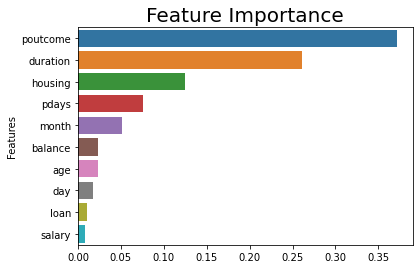

In [84]:
importances=clf2.feature_importances_
feature_importances=pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
selected_features = feature_importances.index.to_list()[:5]
print(selected_features)
sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10])
plt.title('Feature Importance',size=20)
plt.ylabel("Features")
plt.show()

Using Selected Features

In [85]:
clf2.fit(X_train[selected_features], y_train)
y_pred_rf2 = clf2.predict(X_test[selected_features])

In [86]:
show_report(clf2, y_pred_rf2, y_test)

Accuracy:  0.8359541011474713
Precision:  0.49272727272727274
Recall:  0.716931216931217

Classification Report

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1975
           1       0.49      0.72      0.58       378

    accuracy                           0.84      2353
   macro avg       0.72      0.79      0.74      2353
weighted avg       0.87      0.84      0.85      2353


confusion_matrix

[[1696  279]
 [ 107  271]]

cross validation: [0.78011472 0.8387508  0.85395408 0.86798469 0.58418367]


## Compare the performance of the Random Forest and the logistic model

In [87]:
print('Logistic Regression\n')
show_report(clf , y_pred, y_test)
print('\n')
print('='*100)
print('='*100)
print('\nRandom Forest Classifier\n')
show_report(clf2, y_pred_rf2, y_test)

Logistic Regression

Accuracy:  0.8232044198895028
Precision:  0.5
Recall:  0.6610576923076923

Classification Report

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1937
           1       0.50      0.66      0.57       416

    accuracy                           0.82      2353
   macro avg       0.71      0.76      0.73      2353
weighted avg       0.85      0.82      0.83      2353


confusion_matrix

[[1662  275]
 [ 141  275]]

cross validation: [0.77310389 0.72530274 0.78635204 0.77742347 0.75127551]



Random Forest Classifier

Accuracy:  0.8359541011474713
Precision:  0.49272727272727274
Recall:  0.716931216931217

Classification Report

              precision    recall  f1-score   support

           0       0.94      0.86      0.90      1975
           1       0.49      0.72      0.58       378

    accuracy                           0.84      2353
   macro avg       0.72      0.79      0.74      2353
weighted avg      

So Random Forest has less number of false negatives and slightly better accuracy.